# Image Information

The main objectives of this module are:

* Manipulate an image with Python, scikit-image and numpy.
* Process images at the pixel level.
* Compute and understand image histograms.
* Understand lossless compression & reconstruction.
* Understand the co-occurrence matrix.
* Use different colour representations.

## 1. Read & write an image

In this exercise, we will simply open an image file, display it, and save a copy. 

**Use the [scikit-image io](https://scikit-image.org/docs/dev/api/skimage.io.html) module to open, show & save a copy of the "camera.jpg"**

*Note: we use the **%matplotlib inline** command to display the image in the notebook. It would not be necessary if you execute the code in the terminal or in a standard IDE like PyCharm.*

/tmp/ipykernel_27877/1081306109.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(imgCamera)


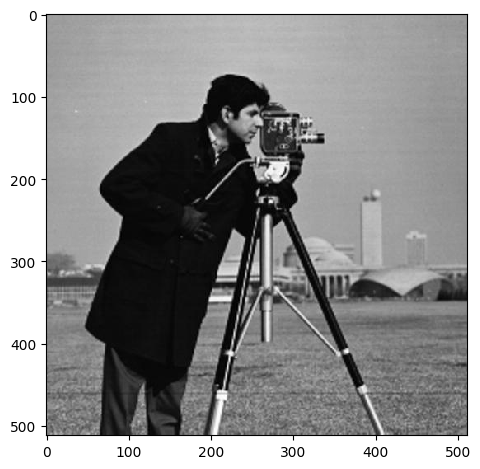

In [18]:
from skimage.io import imread, imsave, imshow
%matplotlib inline

imgCamera = imread('data/camera.jpg')
imshow(imgCamera)

**Try the same with "view.jpg"**

/tmp/ipykernel_27877/50815445.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(imgView)


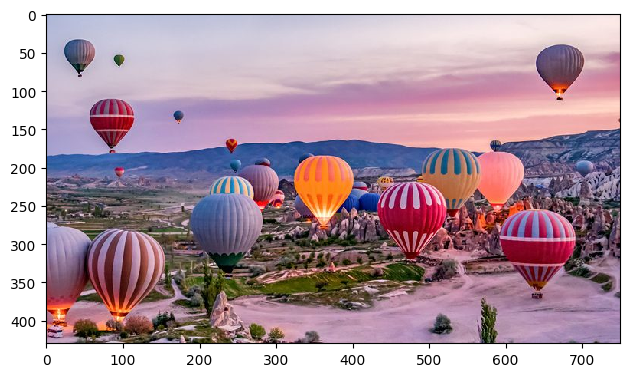

In [19]:
imgView = imread('data/view.jpg')
imshow(imgView)

When you open an image with scikit-image, it is stored as a Numpy [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) object. Numpy arrays are objects which can be easily manipulated for numerical computations.

**Using *ndarray* methods & attributes, answer the following questions about the "camera" and "view" images:**

1. What is the shape of the image? (width & height)
1. What is the minimum pixel value? What is the maximum pixel value?
1. What is the data type for each pixel?


In [20]:
import numpy as np

print("Camera image shape:", imgCamera.shape)
print("Camera min/max:", imgCamera.min(), imgCamera.max())
print("Camera dtype:", imgCamera.dtype)

print("View image shape:", imgView.shape)
print("View min/max:", imgView.min(), imgView.max())
print("View dtype:", imgView.dtype)

Camera image shape: (512, 512)
Camera min/max: 0 255
Camera dtype: uint8
View image shape: (430, 750, 3)
View min/max: 0 255
View dtype: uint8


Note the difference in image shape between a camera.jpg and an view.jpg. The shape of the ndarray show the layers of the matrix. The first two numbers are length and width, and the third number (i.e. 3 in view.jpg) is for three layers: Red, Green, Blue. So, camera.jpg has only one channel making it a greyscale image and view.jpg an RGB image. 

The data type of pixel value is the same for both the images - uint8 which means that the value of each pixel is an 8-bit unsigned integer and the value cannot be outside of the 0 to 255 range.
For a grey scale image 0 corresponds to black pixel value and 255 to white pixel value and the numbers in between have correspond to varying shades of grey.
The red, green and blue use 8 bits each, which have integer values from 0 to 255. This makes 256x256x256=16777216 possible colors.

The actual information that is stored in an image is the "value" of each pixel. With the above information, try to show the pixel values at different spots in the images, for example the camera's coat, sky in both the images, and the hot air balloon from view.jpg.
Also try to show only a 100x100 pixels window taken at the center of the image, head of the cameraman and a single hot air balloon.

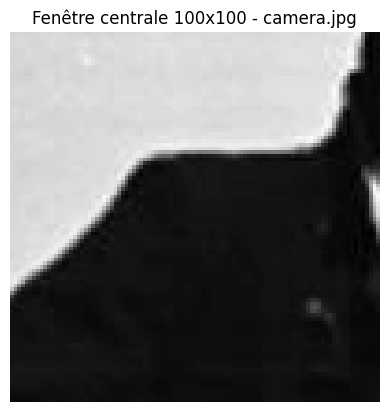

In [21]:
# Afficher quelques valeurs de pixels spécifiques dans les images
import matplotlib.pyplot as plt


# Afficher une fenêtre 100x100 au centre de l'image
h, w = imgCamera.shape
center_window = imgCamera[100:200, 100:200]
plt.figure()
plt.title("Fenêtre centrale 100x100 - camera.jpg")
plt.imshow(center_window, cmap='gray')
plt.axis('off')
plt.show()

Valeur du pixel (ciel, view.jpg) : [193 136 168]
Valeur du pixel (montgolfière, view.jpg) : [193 154 183]


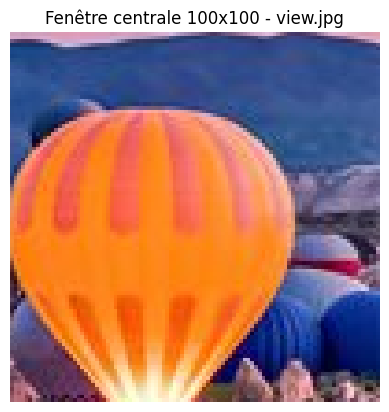

In [ ]:
# Afficher une fenêtre 100x100 au centre de l'image RGB
h2, w2, _ = imgView.shape
center_window_view = imgView[h2//2-50:h2//2+50, w2//2-50:w2//2+50, :]
plt.figure()
plt.title("Fenêtre centrale 100x100 - view.jpg")
plt.imshow(center_window_view)
plt.axis('off')
plt.show()

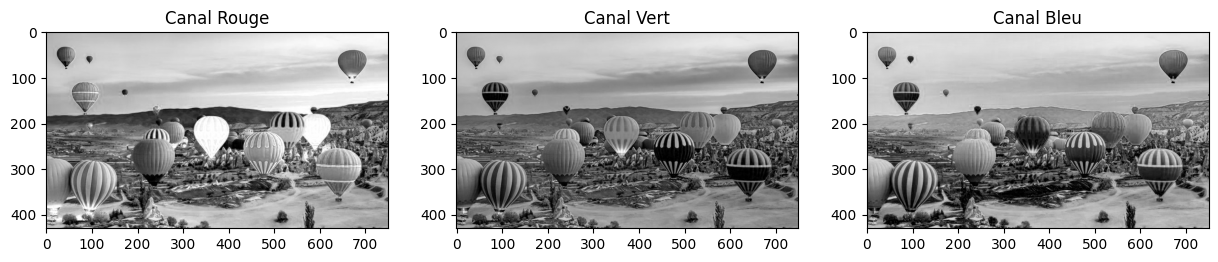

In [33]:
redView = imgView[:, :, 0]
greenView = imgView[:, :, 1]
blueView = imgView[:, :, 2]

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Canal Rouge")
plt.imshow(redView, cmap='gray')

plt.subplot(1,3,2)
plt.title("Canal Vert")
plt.imshow(greenView, cmap='gray')

plt.subplot(1,3,3)
plt.title("Canal Bleu")
plt.imshow(blueView, cmap='gray')
plt.show()



**Need more help? You can check the following videos:**

* [Image I/O](https://www.youtube.com/watch?v=rgJmji4rTpw&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=1)
* [Image data type & color channels](https://www.youtube.com/watch?v=rIO1EJ--yeg&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=2)

## 2. Image histograms

### Compute and plot the histogram and the normalized histogram

 Computer image analysis is about finding ways to use that "raw" information in order to extract "processed" information : what is in the image?

Image histograms are one of the simplest ways of looking at the information contained in an image. An image histogram is made by simply counting the number of pixels that have a given value. The length of the histogram will therefore correspond to the number of possible values in an image (in this case, 256).

You can use the [pyplot module](https://matplotlib.org/api/pyplot_api.html) from matplotlib to display plots & histograms.

First, lets have a look at the images as arrays:

(array([2.070e+02, 9.000e+01, 1.430e+02, 1.840e+02, 2.470e+02, 3.650e+02,
        6.170e+02, 1.408e+03, 3.236e+03, 4.657e+03, 3.874e+03, 5.044e+03,
        5.873e+03, 6.107e+03, 6.026e+03, 4.381e+03, 2.902e+03, 1.504e+03,
        8.610e+02, 6.480e+02, 5.660e+02, 5.060e+02, 4.790e+02, 4.590e+02,
        3.970e+02, 3.980e+02, 3.900e+02, 3.970e+02, 3.600e+02, 3.700e+02,
        3.330e+02, 3.890e+02, 3.680e+02, 3.660e+02, 3.850e+02, 3.950e+02,
        3.590e+02, 3.630e+02, 4.080e+02, 3.540e+02, 3.340e+02, 3.650e+02,
        3.640e+02, 3.260e+02, 3.070e+02, 2.770e+02, 2.550e+02, 2.950e+02,
        2.610e+02, 2.500e+02, 2.490e+02, 2.710e+02, 2.590e+02, 2.700e+02,
        2.540e+02, 3.010e+02, 2.790e+02, 2.770e+02, 3.160e+02, 2.950e+02,
        3.100e+02, 3.330e+02, 3.300e+02, 3.400e+02, 3.130e+02, 2.690e+02,
        2.550e+02, 2.410e+02, 2.290e+02, 2.480e+02, 2.340e+02, 2.160e+02,
        2.220e+02, 2.430e+02, 2.200e+02, 2.220e+02, 1.980e+02, 1.880e+02,
        2.040e+02, 2.090e+02, 2.340e+0

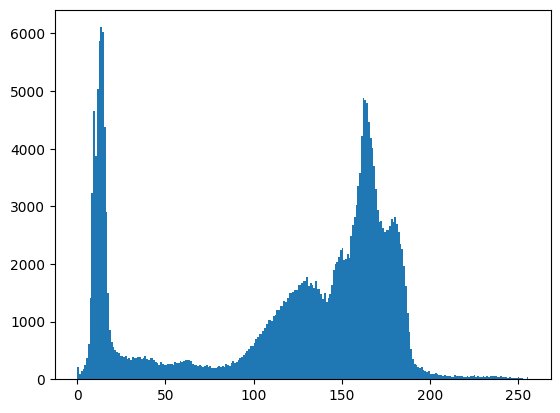

In [34]:
from matplotlib import pyplot as plt

plt.hist(imgCamera.ravel(), bins=256, range=(0, 256))

As we can see, camera.jpg is a 2D array with the grayscale values of each pixel, whereas view.jpg is a 3D array with red, blue and green values ranging from 0 to 255.
We can use the pyplot module from matplotlib to display the image with more options on the plot:

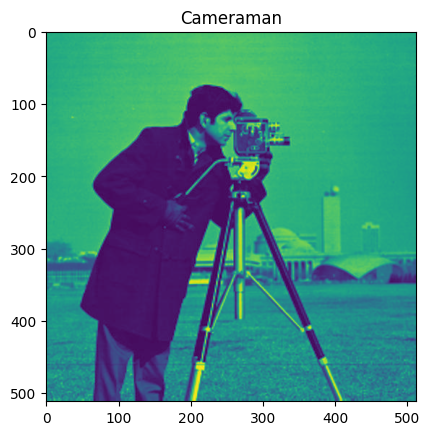

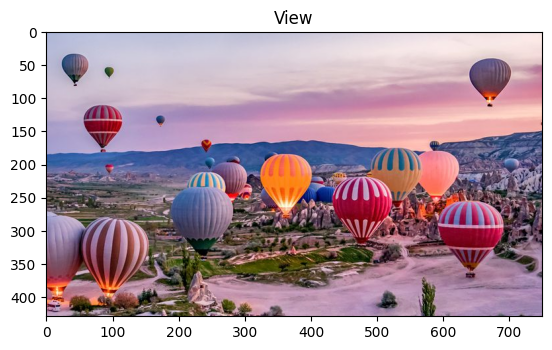

In [35]:
from matplotlib import pyplot as plt

plt.figure()
plt.imshow(imgCamera)
plt.title("Cameraman")
plt.show()


plt.figure()
plt.imshow(imgView)
plt.title("View")
plt.show()

The camera man image is not true to its original colours, why does it look like that?

When you give a grayscale image to matplotlib, it uses a default colormap that is not necessarily "grayscale" to display the information. We can force it to display the image correctly by using the cmap parameter. We can also increase the size of the figure, hide the axis, and make sure that the scale is correct for the values (0 = black, 255 = white), as by default matplotlib uses the lowest value in the image as black and the highest as white.

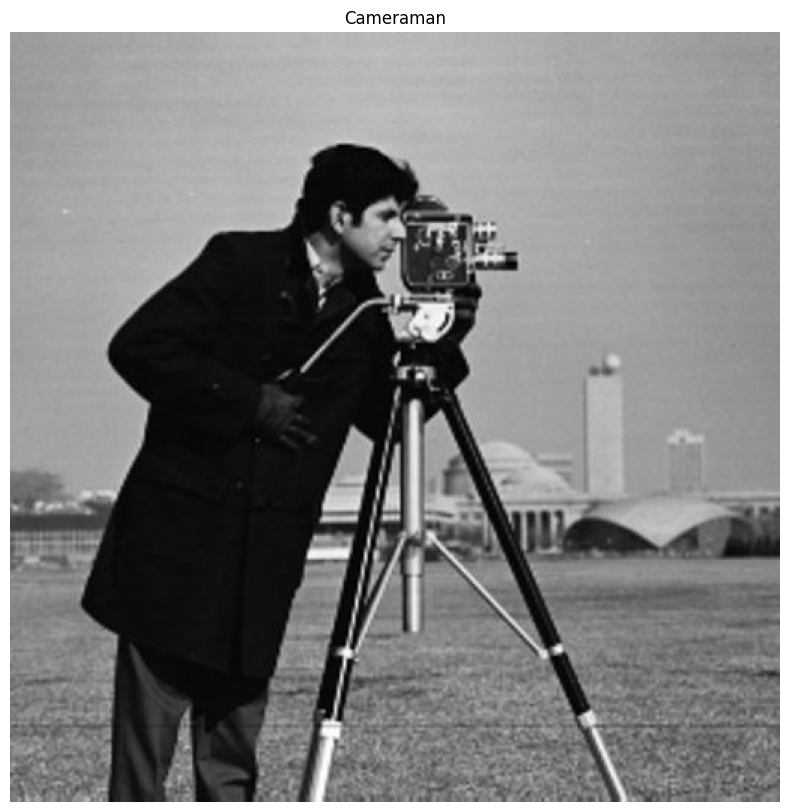

In [37]:
plt.figure(figsize=(10,10))
plt.imshow(imgCamera, cmap="gray", vmin=0, vmax=255)
plt.title("Cameraman")
plt.axis('off')
plt.show()

### **Plotting the histogram**

Now there are different ways to get the histogram for the greyscale and RGB images.

First let's work with the greyscale image (camera.jpg). 

We can use the histogram function from numpy, but let's first try to code it ourselves.
We need to :
1. Create a 256-length vector filled with 0s to initialize the histogram
2. For each value between 0 and 255, count how many pixels in the image have that value and put it in the histogram

In [38]:
# Create 256-length vector filled with 0s
hist = np.zeros((256,)).astype('int')
print("Empty histogram")
print(hist)

Empty histogram
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Can you use the histogram to answer the following questions ? (you don't need to code anything here)

1. What is the average gray value of the cameraman ?
1. What is the average gray value of the sky ?
1. Is there more 'cameraman' pixels than 'sky' pixels ?

In [ ]:
# For each value between 0 and 255 (python's range(a,b) translates to [a,b])
for v in range(0,256):
    hist[v] = (imgCamera==v).sum()

This line is a bit more complex, but it shows how powerful numpy can be for arrays operations. (im==v) does an element-wise comparison between the array im and the scalar v (the value we are looking at). It will create a new array of the same size as im, and fill it with True (1) wherever the pixel value of im was equal to v and with False (0) everywhere else.

Then, the sum function will sum all values of this new array. This counts the number of pixels with that particular value.

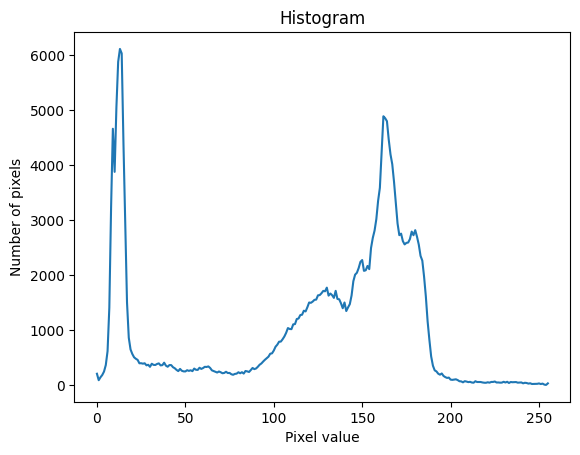

In [43]:
plt.figure()
plt.plot(hist)
plt.title("Histogram")
plt.xlabel("Pixel value")
plt.ylabel("Number of pixels")
plt.show()

Very often, instead of using this raw histogram, we will use the **"normalized histogram"**, which looks exactly the same except that we want the sum of all values to be equal to 1 (the histogram will therefore become like a probability distribution that a pixel in the image has a given value).

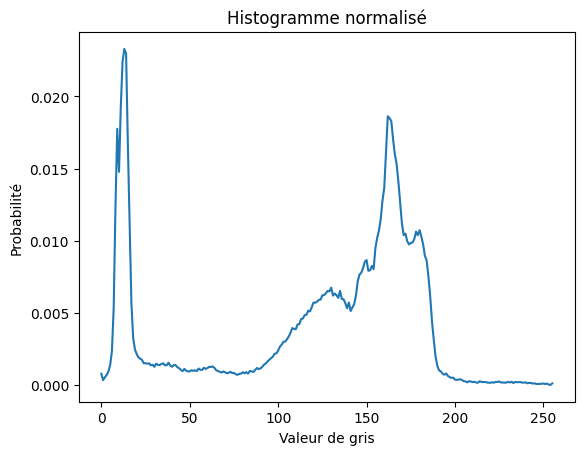

In [44]:
N = hist.sum()

hist_norm = hist / N

plt.figure()
plt.plot(hist_norm)
plt.title("Histogramme normalisé")
plt.xlabel("Valeur de gris")
plt.ylabel("Probabilité")
plt.show()


We can also use the histogram method from numpy, but make sure to check the documentation on how to use it properly. Numpy's histogram method expects a flat vector, not a 2D image. Also, the "bins" of the histogram have to be specified, and the way they work is not necessarily intuitive: the numpy method is generalized so that it can work on float data and not just on integers, so the bins are defined by intervals rather than the discrete sampling that we've done above. There are multiple options for defining the intervals:

If you pass an integer to the "bins" parameter, numpy will divide the image range in that number of equally spaced bins. Note that if you do that on an image that doesn't start at 0 or end at 255 (for instance, and over- or under-exposed image), it will not give you the "correct" intervals:

In [45]:
im2 = imgCamera.copy()
im2 = np.maximum(im2, 10) # set all pixels with value < 10 to 10.  
hist_np, bins = np.histogram(im2.flatten(), bins=256)
print(bins[:5])

[10.         10.95703125 11.9140625  12.87109375 13.828125  ]


Alternatively, you can define the intervals yourself using a range, but here you should be aware of the (sometimes unexpected) behaviour of the method. If you have a range [0, 1, 2, 3], the histogram will contain 3 bins: [0, 1], [1, 2], and [2, 3], with the last bin including the last item in the range. In that case, if we have an integer image, the last bin would contain both the im==2 and the im==3 pixels! We can see this behaviour in action if we try to use a range (256):

In [46]:
im2 = imgView.copy()
im2 = np.maximum(im2, 10) # set all pixels with value < 10 to 10.  
hist_np, bins = np.histogram(im2.flatten(), bins=256)
print(bins[:5])

[10.         10.95703125 11.9140625  12.87109375 13.828125  ]


We can see that the histogram is a length-255 vector instead of 256, and if we compare to the one we computed manually, the last two bins have been put together. So if we want to reproduce the histogram we had before, we need to use a range(257), so that the last bin contains the interval [255, 256], correctly matching the im==255 bin !

In [48]:
hist = np.bincount(imgCamera.ravel(), minlength=256)

### **Now what can we do with this information?**

We can see that there are two great "peaks" : at around 15 (which would be almost black), and at around 160 (which is light gray). It seems like a reasonable guess to say that those values are mostly the cameraman's black coat, and the sky, which are both very homogeneous regions with a lot of pixels of the same color.

To check that, we could try to quickly segment the image using this information. Let's look at the image of all pixels between 10 and 20, and all pixels between 155 and 165:

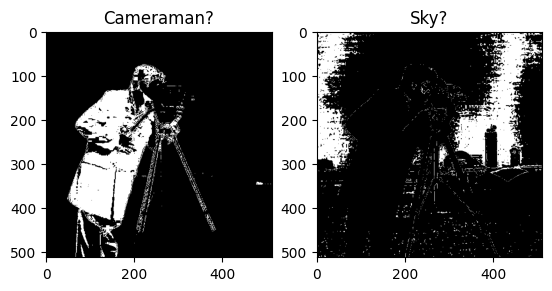

In [50]:
dark_image = (imgCamera<=20)*(imgCamera>=10)
light_image = (imgCamera<=165)*(imgCamera>=155)

#imgCamera<=20 Renvoie un tableau booléen de même taille que l’image.
#la multiplication des deux masques donne 1 si on a true/true (ET logique)

plt.figure()
plt.subplot(1,2,1) # Subplots can show multiple images on the same figure.
plt.imshow(dark_image, cmap=plt.cm.gray)
plt.title('Cameraman?')
plt.subplot(1,2,2)
plt.imshow(light_image, cmap=plt.cm.gray)
plt.title('Sky?')
plt.show()

That's not too bad, but clearly we don't have all of the sky. We can in fact see in our histogram that the peak is wider for the sky than for the cameraman. Let's try to find better values:

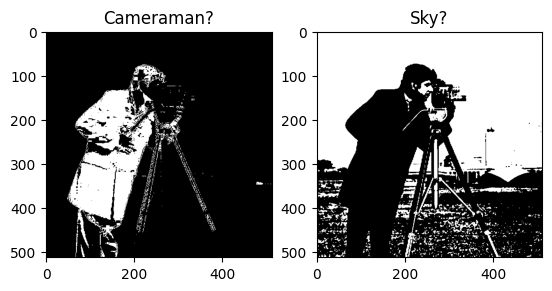

In [52]:
dark_image = (imgCamera<=20)*(imgCamera>=10)
light_image = (imgCamera<=250)*(imgCamera>=140)

#imgCamera<=20 Renvoie un tableau booléen de même taille que l’image.
#la multiplication des deux masques donne 1 si on a true/true (ET logique)

plt.figure()
plt.subplot(1,2,1) # Subplots can show multiple images on the same figure.
plt.imshow(dark_image, cmap=plt.cm.gray)
plt.title('Cameraman?')
plt.subplot(1,2,2)
plt.imshow(light_image, cmap=plt.cm.gray)
plt.title('Sky?')
plt.show()

That's far from perfect but it's good enough for now. But with this, try to answer these questions :

The average gray value of the cameraman is around 15.
The average gray value of the sky is around 165.


The peak of the cameraman is higher than the peak of the sky, but the peak of the sky is wider. To know if there is more in one or the other, we have to compute the sum of those regions of the histogram.

In [53]:
nb_cam = hist[10:21].sum()
nb_sky = hist[155:166].sum()

print(nb_cam, nb_sky)

37786 41138


This seems to indicate that there are more pixels in the sky.

### **Plotting the cummulative histogram**

Cumulative histogram is a mapping that counts the cumulative number of pixel intensity values in all ofthe bins up to the current bin.
The cumulative histogram of a histogram is defined as : 

$Ci = \sum_{j=0}^i h_j$

The cumulative histogram is useful for some imageoperations that use histograms: such as Image histogram equalisation

Compute and plot the **cumulated histogram**.

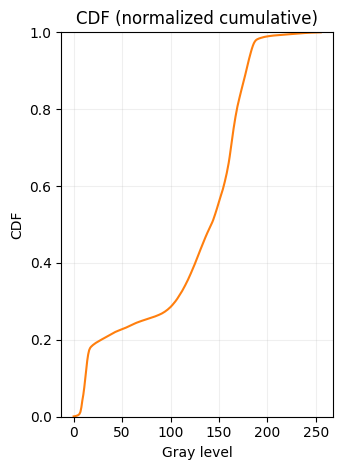

In [ ]:
cum = np.cumsum(hist)
vals = np.arange(256)

cdf = cum / cum[-1]

plt.subplot(1,2,2)
plt.plot(vals, cdf, color='C1')
plt.title('CDF (normalized cumulative)')
plt.xlabel('Gray level'); plt.ylabel('CDF')
plt.ylim(0, 1); plt.grid(a# For each value between 0 and 255 (python's range(a,b) translates to [a,b])
for v in range(0,256):
    hist[v] = (imgCamera==v).sum()lpha=0.2)

plt.tight_layout(); plt.show()

**Need more help? You can check the following videos:**

* [Computing a greyscale histogram](https://www.youtube.com/watch?v=g6hkHQbwB0I&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=3)
* [Numpy arrays: operations, indexing, masking](https://www.youtube.com/watch?v=rPNTkrM2dZw&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=4&t=253s)
* [Normalized and cumulative histograms](https://www.youtube.com/watch?v=uCgu0-KZt1o&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=5)

### Histogram Analysis of RGB image

Let's start by having a look at the immunohistochemistry image.

(512, 512, 3)
0 255


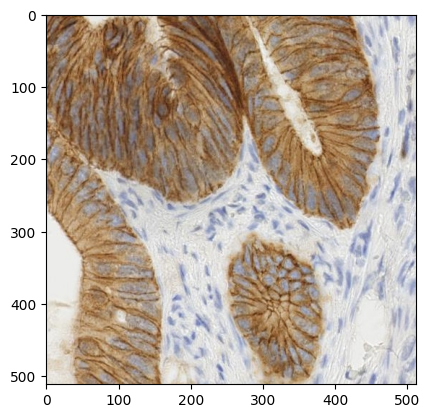

In [55]:
from skimage.data import immunohistochemistry

im = immunohistochemistry()
print(im.shape)
print(im.min(),im.max())

plt.figure()
plt.imshow(im)
plt.show()

As seen with the view.jpg image, the immunohistochemistry image also has dimensions of 512x512 pixels, with 3 8-bits channels (values between 0 and 255).

We want to isolate the "brown cells" in the RGB and HSV space. To see what we are dealing with, it would be interesting to first have a look at the histograms for the different channels. Let's start in RGB.

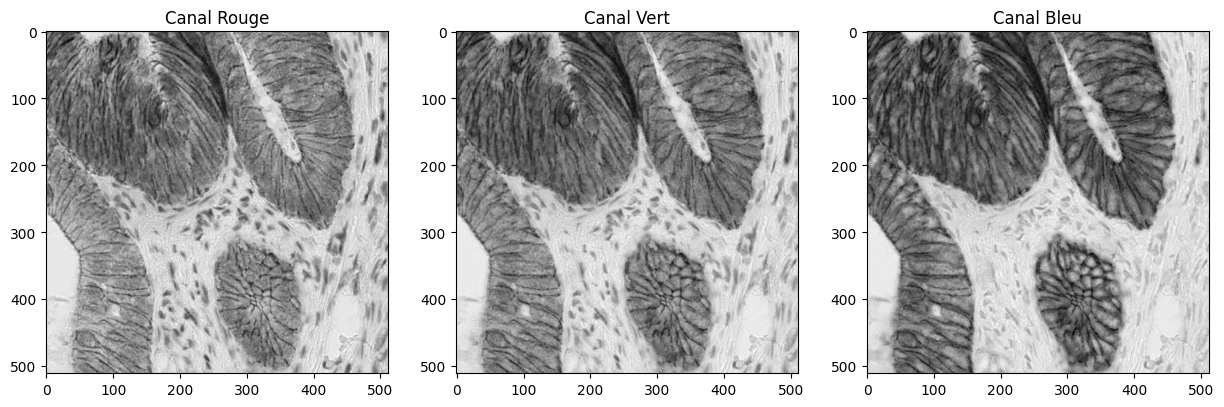

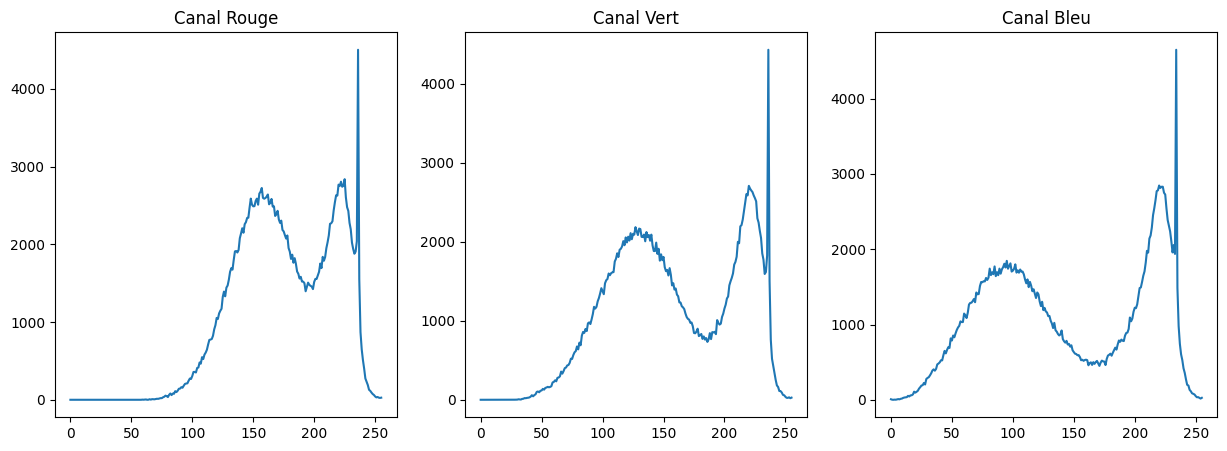

In [68]:
imRed = im[:, :, 0]
imGreen = im[:, :, 1]
imBlue = im[:, :, 2]

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Canal Rouge")
plt.imshow(imRed, cmap='gray')

plt.subplot(1,3,2)
plt.title("Canal Vert")
plt.imshow(imGreen, cmap='gray')

plt.subplot(1,3,3)
plt.title("Canal Bleu")
plt.imshow(imBlue, cmap='gray')
plt.show()

histR = np.zeros((256,)).astype('int')
histG = np.zeros((256,)).astype('int')
histB = np.zeros((256,)).astype('int')


for v in range(0, 256):
    histR[v] = (imRed==v).sum()

for v in range(0, 256):
    histG[v] = (imGreen==v).sum()

for v in range(0, 256):
    histB[v] = (imBlue==v).sum()


plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Canal Rouge")
plt.plot(histR)

plt.subplot(1,3,2)
plt.title("Canal Vert")
plt.plot(histG)

plt.subplot(1,3,3)
plt.title("Canal Bleu")
plt.plot(histB)
plt.show()


We see that the 3 histograms have a similar shape, with 3 distinct peaks. 

Let's try to find out exactly where they are by finding the local maxima (that I'll define here as "higher value than anything in a size-10 neighbourhood and >= than 0")

In [80]:
import numpy as np
from scipy.ndimage import maximum_filter

def local_peaks_size10(hist):
    h = np.asarray(hist, dtype=float)
    neigh = 10
    footprint = np.ones(2*neigh + 1, dtype=bool)
    footprint[neigh] = False  # exclure le centre
    neigh_max = maximum_filter(h, footprint=footprint, mode='constant', cval=-np.inf)
    peaks_idx = np.where((h >= 0) & (h > neigh_max))[0]
    return peaks_idx

def detect_peaks_rgb(histR, histG, histB, edges=None):
    # edges: optionnel (bords des bins si ton hist vient de np.histogram)
    results = {}
    for name, hist in [('R', histR), ('G', histG), ('B', histB)]:
        idx = local_peaks_size10(hist)
        counts = np.asarray(hist, dtype=float)[idx]
        if edges is None:
            # cas standard: 256 bins -> niveau de gris = indice
            gray_levels = idx.astype(int)
        else:
            # si tu as les bords des bins (len(edges)=257), prendre le centre de bac
            centers = 0.5 * (edges[:-1] + edges[1:])
            gray_levels = centers[idx]
        results[name] = {
            'indices': idx,
            'gray_levels': gray_levels,
            'counts': counts
        }
    return results

# --- utilisation ---
res = detect_peaks_rgb(histR, histG, histB)   # ou detect_peaks_rgb(histR, histG, histB, edges)

# impression lisible
def fmt(arr):
    return np.array2string(np.asarray(arr), separator=', ')

print("Pics (niveaux de gris) et comptages:")
for c in ['R', 'G', 'B']:
    gl = res[c]['gray_levels']
    ct = res[c]['counts']
    print(f"- {c}: gray={fmt(gl)} ; counts={fmt(ct)}")


Pics (niveaux de gris) et comptages:
- R: gray=[157, 225, 236] ; counts=[2725., 2838., 4503.]
- G: gray=[127, 220, 236] ; counts=[2186., 2709., 4432.]
- B: gray=[ 95, 220, 234] ; counts=[1846., 2846., 4648.]


What could a good "brown candidate" be with those values? 

If we look at the pixels at the top-left corner of the image, we have:

In [ ]:

## -- Your code here -- ##

The closest peaks to those values would be red=157, green=127, blue=95, which would be a bit brighter on average. This makes sense: the top-left corner is a darker brown than most brown pixels in the image.

Let's use [157,127,95] as our "brown" reference.

If we represent each color as a point in (R,G,B) space, we can compute an euclidian "color distance" between a pixel and this brown reference as :

$d_{colour} = \sqrt{(R-R_{ref})^2 + (G-G_{ref}) + (B-B_{ref})^2)}$

We can try to visualize this using mplot3d. Each point in the  scatterplot below is a pixel from the image, set in the RGB space. The larger point is the "reference brown".

In [ ]:
ref_brown = np.array([157.,127.,95.])

from mpl_toolkits.mplot3d import Axes3D
pixels = im.reshape((im.shape[0]*im.shape[1],3))[::10,:] # we take 1/10th of the pixels, because otherwise it takes too long to render.
col = np.zeros((pixels.shape[0],4)) # we create a RGBA array so that we can give transparency to the points and better see everything
col[:,:3] = pixels/255
col[:,3] = 0.1
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pixels[:,0], pixels[:,1], pixels[:,2], s=2, c=col)
ax.scatter(ref_brown[0],ref_brown[1],ref_brown[2],s=50,c=[ref_brown/255])
plt.show()

In image processing measuring and valuing a distance between two points is important. 
The Euclidean distance tools describe each cell's relationship to a source or a set of sources based on the straight-line distance.

In [ ]:
# Compute the Eucledian distance #
# Eucledian distance = sqrt( sum( difference^2 ) )

## -- Your code here -- ##

We can look at the histogram of the "distance" image to see if we can find a threhold that looks interesting:

In [ ]:
# Plot the histogram #


## -- Your code here -- ##

Let's try a few possible candidates : right after the left peak (~30), somewhere in the down-slope (~50), at the low point in the middle (~120)

In [ ]:
## -- Your code here -- ##

The second one doesn't look bad. There is still a lot of confusion between the brown and the blue, however. In RGB space, it will be difficult to do better.

Let's now look at the hsv color-space to see if it might be easier to analyze the image there. We first need to convert the image:

In [ ]:
from skimage.color import rgb2hsv

hsv = rgb2hsv(im)

# Covert to HSV-space #


## -- Your code here -- ##

The hue is normally expressed as an angle (in radian or degrees), but is here encoded as a float between 0 and 1. To show the histogram, we can simply multiply that number by 360 to "convert" it to degrees.

In [ ]:
# Plot the histogram #


## -- Your code here -- ##

So now we have a very sharp peak in the colour space. Let's find its value, and see what the "distance map" looks like, and how it compares to the distance in RGB space.

In [ ]:
## -- Your code here -- ##

We can also compare the histograms of the distances :

In [ ]:
# Plot the histogram #


## -- Your code here -- ##


As we can see, there is a much sharper peak in Hue space, which means that the brown pixels tend to be much "closer" together. This is normal, as in HSV space the differences in "saturation" and "value" (which can be seen as the color-to-gray scale and the light-to-dark scale) are independant from the differences in hue (the color-to-color scale).

This means that a "light brown" and a "dark brown", which can be very different in RGB space, will be very close together in Hue space. Let's try to find a good threshold for the Hue distance:

In [ ]:
## -- Your code here -- ##

We can see that there are still some problems, with pixels from the background which are seen as brown. That's because those pixels are fully saturated (completely gray), which means that their hue is mostly random. We can easily get rid of them by adding a threshold on the the saturation channel:

In [ ]:
## -- Your code here -- ##

To better visualize those results, we can use the segmentation as a mask to remove all non-brown pixels and compare the HSV and RGB images.

In [ ]:
# Calculate the mask #


## -- Your code here -- ##

Unsurprisingly, the HSV results are much better, as the color information is encoded in a way that makes it easier to use. RGB color space is a good way to encode the information for display (as it directly relates to the way the screen will show it), but isn't always very practical for analysis.

**Need more help? You can check the following videos:**

* [RGB vs HSV](https://www.youtube.com/watch?v=oVpSTZtZQNM&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=10)
* [Distances: image space and colour space](https://www.youtube.com/watch?v=f6aJJldc38E&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=11)
* [Creating a Magic Wand](https://www.youtube.com/watch?v=Aw--_cJ7o5I&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=12)

## 3. Image entropy

The "entropy" of a signal, in information theory, can generally be interpreted as the "number of bits required to encode the signal". It is a measure of the "amount of information" contained in the signal. Intuitively, a signal with a very narrow distribution (all values are close to each other) will have a very low entropy, while a signal with a wide distribution (the values are evenly distributed) will have a higher entropy.


### **1. Compute the image entropy of the camera.jpg image.** 

The image entropy is given by:
           
$e = - \sum_{g=0}^N p(g) \log_2(p(g))$ 

where $p(g)$ is the probability that a pixel has the grayscale value g, and N is the number of possible grayscale values. Note that $p(g)$ is directly given by the normalized histogram.

The entropy is generally computed using the base 2 logarithm, so that we can give it the information theory interpretation of "number of bits per element" necessary to encode the data

In [ ]:
import numpy as np
from skimage.io import imread,imsave,imshow
from matplotlib import pyplot as plt


#Compute the entropy #


## -- Your code here -- ##

def entropy (im):
    #compute normalized histogram -> p(g)
    # ## -- Your code here -- ##

    #compute the entropy e
    ## -- Your code here -- ##

The entropy will be higher when you have an even distribution of grayscale vale, and lower if the image is more homogeneous. We can look at the extreme cases of a completely random image, and of a uniform image:

In [ ]:
A = (np.random.random((100,100))*255).astype('uint8')
B = np.zeros((100,100))
print("Entropy of a random image :", entropy(norm_hist(A)))
print("Entropy of a uniform image :", entropy(norm_hist(B)))

A truly uniform distribution would have an entropy of 8 (which corresponds to the number of bits per pixels necessary to encode the information), while a uniform image has an entropy of 0.

Now let's apply this to the cameraman:

In [ ]:
#compute the entropy for camera.jpg
    ## -- Your code here -- ##

### **2. What is the entropy of a shuffled version of the cameraman?**

As the entropy is computed on the histogram of the image, it doesn't take into account any sort of spatial information. If we shuffle the cameraman image randomly, it may seems like we produce a "random" image, but the entropy is exactly the same:

In [ ]:
# It's easier to shuffle the image if it's first flattened in 1D

## -- Your code here -- ##

**Need more help? You can check the following videos:**

* [Computing the image entropy](https://www.youtube.com/watch?v=L2VtGt2FsRQ&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=6)

## 4. Image compression

Using the code below as a starting point:

- **Decompose an image** by recursively subsampling its dimensions and computing the remainders, such that each level of recursion performs the following operation:

![ ](image.png)



Subsampling is a way of reducing the size of an image. 

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread

# Modify this method:
def split(im):
    a = im[0:-1:2,0:-1:2]
    b = im[0:-1:2,1::2]
    c = im[1::2,0:-1:2]
    d = im[1::2,1::2]
    
    R = np.vstack((np.hstack((a,b)),np.hstack((c,d))))
    return R

im = imread('camera.jpg').astype(np.int16) # cast the camera image as a signed integer to avoid overflow
s = split(im)

plt.figure(figsize=(12,12))
# interpolation='nearest' -> don't try to interpolate values between pixels if the size of the display is different from the size of the image
# cmap=cm.gray -> display in grayscale
# vmin=-255 -> set "black" as -255
# vmax=255 -> set "white" as 255
plt.imshow(s,interpolation='nearest',cmap=cm.gray,vmin=-255, vmax=255)
plt.colorbar()

plt.show()

**Compute how the image entropy evolves** with regards to the level of decomposition

In [ ]:
#entropy will tend to be higher when we have a flatter histogram, and it will be lower when we have narrow peaks
#the idea here is that pixels that are very close together in the image will tend to have very similar value; borders not included


# -- Your code here -- #

We can easily observe that the entropy has gone down quite a bit, which was our goal, without losing any information

**Rebuild the original image** from the pyramid (allowing the selection the level of recursion)

In [ ]:
# -- Your code here -- #

**Need more help? You can check the following videos:**

* [Subsampling and rescaling](https://www.youtube.com/watch?v=rYNUby5bIlA&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=7)
* [Pyramid compression](https://www.youtube.com/watch?v=yrsyF8T5OAU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=8)

## 5. Co-occurrence matrix

While the histogram of an image is independent of the position of the pixels, the co-occurrence matrix gives us information about their spatial distribution.

A co-occurrence matrix is computed for a given displacement, looking at the pair of values spatially separated by that displacement. The co-occurrence matrix is a square matrix, its size given by the number of possible values that a pixels can take in the image.

1. Compute de [cooccurrence matrix](https://en.wikipedia.org/wiki/Co-occurrence_matrix) for a chosen displacement $(\Delta x,\Delta y)$ (see [greycomatrix](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.greycomatrix) in scikit-image)
1. What is the entropy of the cooccurrence matrix ?
1. How does this entropy evolve if we increase the displacement ?

In [ ]:
from skimage.feature import graycomatrix
from skimage.io import imread
import numpy as np

# -- Your code here -- #

As we can see, short distances have most of the values of the co-occurence matrix close to the diagonal. This means that pixels that are close spatially tend to also have similar values. If we look at a longer distance, we will see a flatter distribution, and therefore a higher entropy.

**Need more help? You can check the following videos:**

* [Grayscale co-occurence matrix](https://www.youtube.com/watch?v=cq0Br3zB2AU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=9)

# Coding Project - Watermark

Write code to automatically add a watermark to a photograph.

![ ](wm_proj.jpg)

## Main requirements

The minimum requirements are to:
* Add the white pixels from the watermark somewhere in the photograph.
* Save the resulting image as an image file & display it in the notebook

You may use the *watermark.png* file available in the GitHub repository, or choose/create your own.

## Additional requirements

(note: this is not an exhaustive list, use your imagination!)

* Add an option to choose the watermark location
* Add transparency effect to the watermark
* Determine if the watermark should be dark or light based on the luminosity of the image


In [ ]:
# -- Your code here -- #